**✨SIMPLE EXPLORATORY DATA ANALYSIS (EDA)**

Import Library

In [ ]:
import pandas as pd

Load Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Drop atau membuah Kolom "ID"

In [ ]:
df.drop(columns='Id', inplace=True) #inplace= df yg sama tanpa membuat df lain
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Identifikasi Bentuk/Dimensi Dataset

In [ ]:
df.shape

(150, 5)

Menampilkan Daftar Kolom dan Tipe Data

In [ ]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

Informasi Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Identifikasi Missing Value

In [ ]:
df.isna().values.any() #Mendeteksi nilai kosong

False

Identifikasi Duplikasi

In [ ]:
df[df.duplicated()] #Menampilkan baris duplikasi sekunder
df[df.duplicated(keep=False)] #Menampilkan seluruh baris duplikasi

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


In [ ]:
df.duplicated().value_counts() #Jumlah duplikasi data

False    147
True       3
Name: count, dtype: int64

Hapus Duplikasi

In [ ]:
df.drop_duplicates(inplace=True) #Menghapus duplikasi data
df.shape

(147, 5)

Statistik Deskriptif

In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Correlation Matrix

In [ ]:
numerical_df = df.select_dtypes(include=['float', 'int'])
correlation_matrix = numerical_df.corr()
print(correlation_matrix)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109321       0.871305      0.817058
SepalWidthCm       -0.109321      1.000000      -0.421057     -0.356376
PetalLengthCm       0.871305     -0.421057       1.000000      0.961883
PetalWidthCm        0.817058     -0.356376       0.961883      1.000000


**✨DATA VISUALISASI**

Import Library

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Heatmap

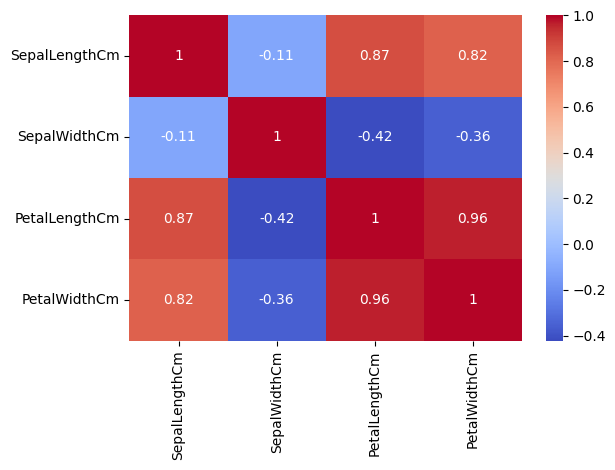

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm')
plt.tight_layout()
plt.show()

Bar Plot

In [ ]:
df['Species'].value_counts() #Menghitung jumlah setiap species

Species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

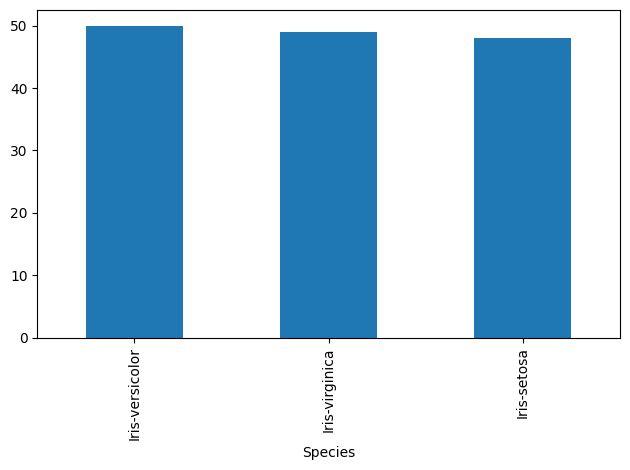

In [ ]:
df['Species'].value_counts().plot.bar()
plt.tight_layout() #Menampilkan visualisasi optimal dari layar yang ada
plt.show()

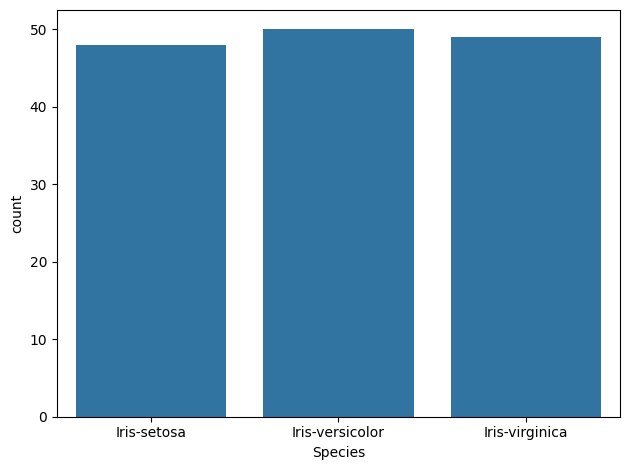

In [ ]:
sns.countplot(data=df, x='Species')
plt.tight_layout()

Pie Chart

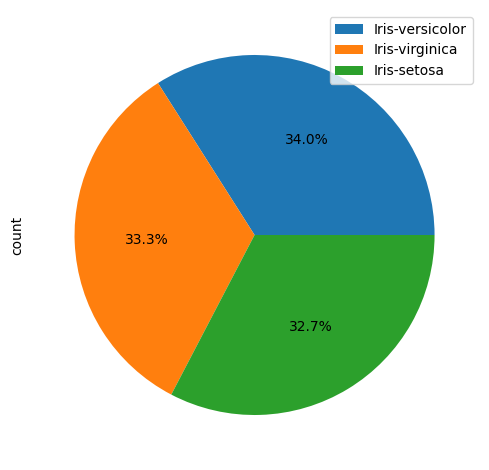

In [ ]:
df['Species'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=True)
plt.tight_layout()

Plot

Text(0.5, 1.0, 'Petal Width')

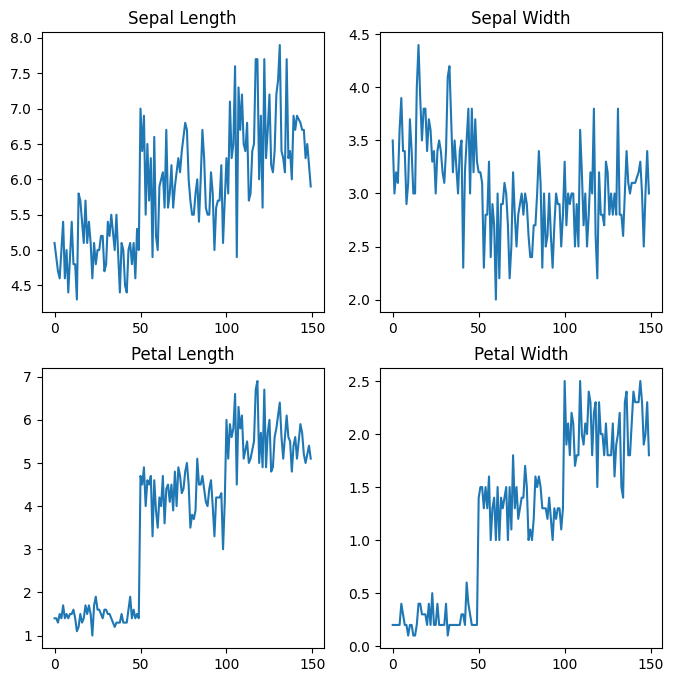

In [ ]:
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

df['SepalLengthCm'].plot.line(ax=ax[0][0])
ax[0][0].set_title('Sepal Length')

df['SepalWidthCm'].plot.line(ax=ax[0][1])
ax[0][1].set_title('Sepal Width')

df['PetalLengthCm'].plot.line(ax=ax[1][0])
ax[1][0].set_title('Petal Length')

df['PetalWidthCm'].plot.line(ax=ax[1][1])
ax[1][1].set_title('Petal Width')

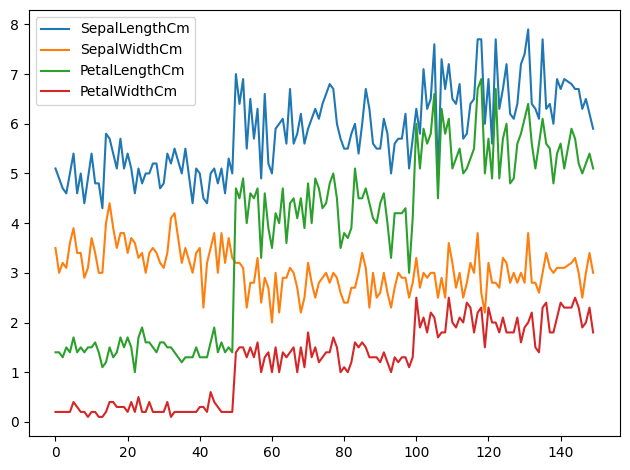

In [ ]:
df.plot() #visualisasi baris dalam satu kotak
plt.tight_layout()

Histogram

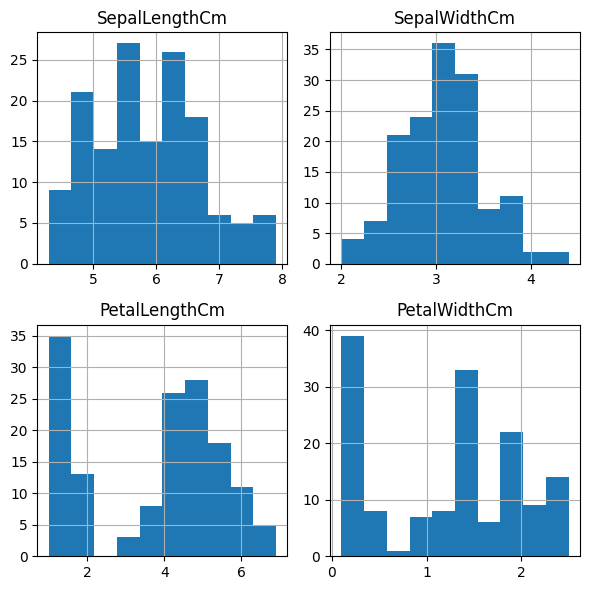

In [ ]:
df.hist(figsize=(6,6), bins=10) #bins adalah penggalan data atau lebar data
plt.tight_layout()

Boxplot

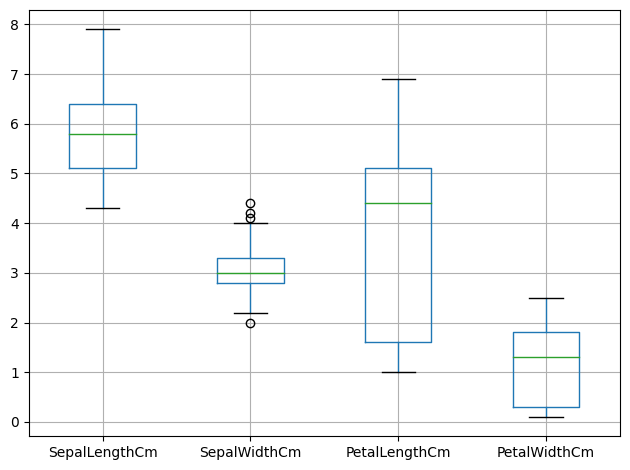

In [ ]:
df.boxplot()
plt.tight_layout()

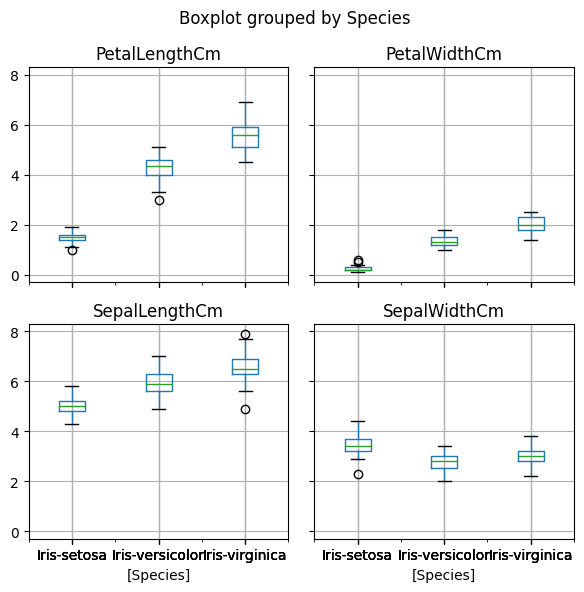

In [ ]:
df.boxplot(by='Species', figsize=(6,6))
plt.tight_layout()

Scatter Plot

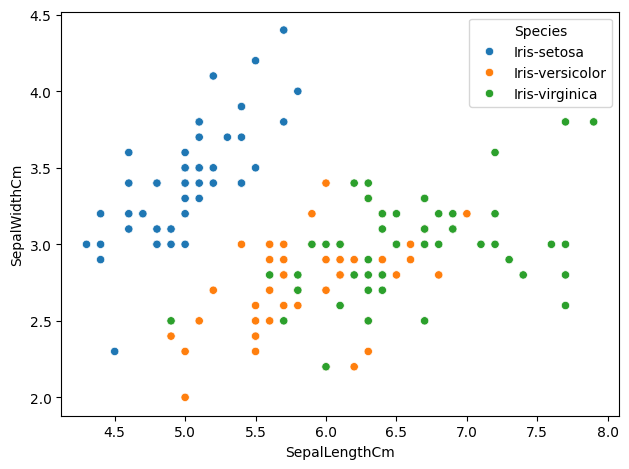

In [ ]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=df, hue='Species')
plt.tight_layout()

Pair Plot

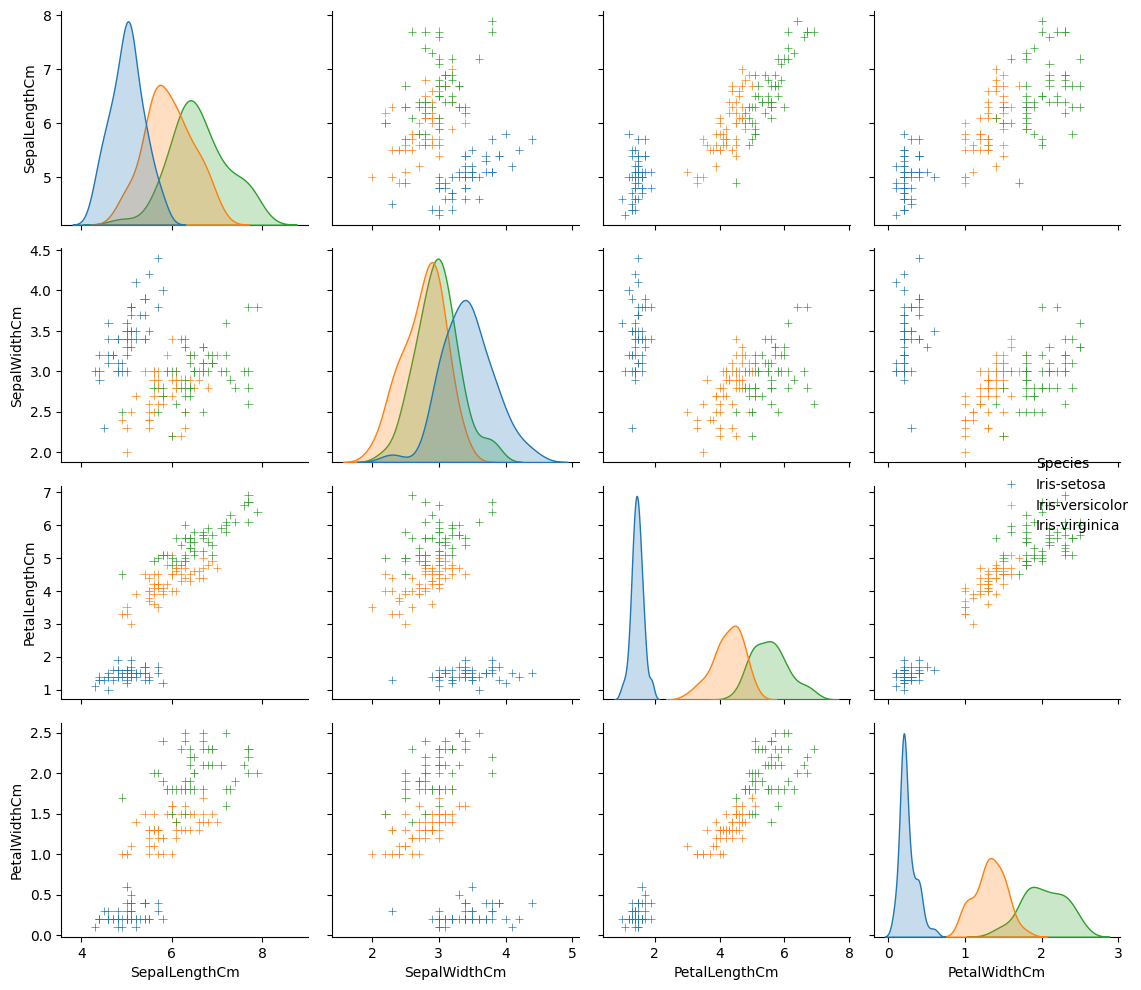

In [ ]:
sns.pairplot(df, hue='Species', markers='+')
plt.tight_layout()

Violin Plot

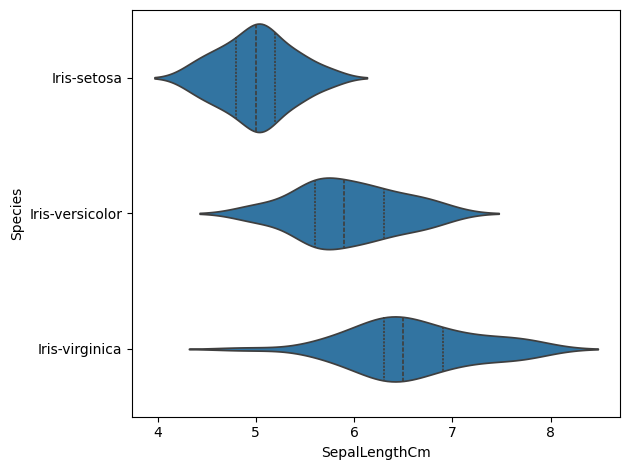

In [ ]:
sns.violinplot(data=df, y='Species', x='SepalLengthCm', inner='quartile')
plt.tight_layout()